# Goal of this Notebook

The goal in this notebook is to summarize a typical workflow required to prepare the data for machine learning. it contains the following sections:

- ** Part 0: loading data**
- ** Part 1: Getting to know the data**
- ** Part 2: null value investigation**
- ** Part 3: dropping duplicates**
- ** Part 4: Converting the object to appropriate type and parsing dates**
- ** Part 5: Imputation**
- ** Part 6: Getting dummy variables**
- ** Part 7: Finding and removing outliers**
- ** Part 8: Scaling and Transforms**

In [93]:
## importing requered libraries
import pandas as pd
from numpy import nan as NA
import numpy as np
import matplotlib.pyplot as plt
from encodings.aliases import aliases
%matplotlib inline

## Part 0: Loading data

In [94]:
data = pd.read_csv(r'bp2018.csv') #loading the data, this file will be loaded with no problem

In [9]:
'''some times data is not going to be loaded easily, due to headers issue. In such a case one can investigate first few lines'''
file = open('bp2018.csv')
for i in range(10):
    line = file.readline()
    print('line: ', i,  line)
file.close()  

line:  0 Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,biofuels_kboed,biofuels_ktoe,biogeo_mtoe,biogeo_twh,biomass_mtoe,biomass_twh,co2_mtco2,coalcons_mtoe,coalprod_mt,coalprod_mtoe,elect_twh,electbyfuel_coal,electbyfuel_gas,electbyfuel_oil,electbyfuel_other,gascons_bcfd,gascons_bcm,gascons_mtoe,gasprod_bcfd,gasprod_bcm,gasprod_mtoe,geothermal_mtoe,geothermal_twh,hydro_mtoe,hydro_twh,nuclear_mtoe,nuclear_twh,oilcons_kbd,oilcons_mt,oilcons_mtoe,oilprod_kbd,oilprod_mt,oilreserves_bbl,primary_mtoe,refcap_kbd,refthru_kbd,renewables_mtoe,renewables_twh,solar_mtoe,solar_twh,wind_mtoe,wind_twh

line:  1 Algeria,1965,DZA,12,Africa,Northern Africa,1,0,0,,,0,0,0,0,5.568752776,0.07,,,,,,,,0.071891945,0.74305,0.638907997,,,,0,0,0.089,0.3933266,0,0,26.71619178,1.289,1.324613237,577.3767123,26.481,,2.122521233,54.22191781,,0,0,0,0,0,0

line:  2 Algeria,1966,DZA,12,Africa,Northern Africa,1,0,0,,,0,0,0,0,6.867505979,0.068,,,,,,,,0.074685673,0.771925,0.663736028,,,,0,0,0.082

In [41]:
'''some times encoding is not utf-8, so we need to try all different encodings to import the data'''
alias_values = set(aliases.values())
for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("bp2018.csv", encoding=encoding)
        print('successful', encoding)
    except:
        pass
    
'''so we can find out which encoding is successfull and find a library capable of reading it if Pnadas cant handle it'''

successful big5
successful cp1250
successful cp861
successful cp1256
successful euc_jp
successful mac_iceland
successful iso2022_jp
successful ptcp154
successful mbcs
successful iso8859_7
successful mac_turkish
successful utf_16_be
successful gb18030
successful tis_620
successful cp1026
successful cp932
successful hp_roman8
successful utf_7
successful cp273
successful cp864
successful iso8859_6
successful utf_8
successful iso8859_15
successful gbk
successful iso8859_4
successful mac_cyrillic
successful cp850
successful utf_16_le
successful cp858
successful iso2022_kr
successful cp1255
successful cp869
successful ascii
successful cp1125
successful latin_1
successful iso8859_16
successful iso8859_14
successful cp1258
successful big5hkscs
successful shift_jis
successful mac_latin2
successful iso2022_jp_3
successful euc_kr
successful hz
successful cp1254
successful shift_jisx0213
successful cp950
successful iso8859_13
successful gb2312
successful iso2022_jp_1
successful cp949
successful sh

###  Some common loading cases
There is usually more into loading. As an example we could load all the data as string type using dtype option:

- **data = pd.read_csv('bp2018.csv', dtype=str)**

another examples is when we typycally skip some rows in the data:

- **data = pd.read_csv('bp2018.csv', skiprows=4)**

loading *json* format

- ** data_json = pd.read_json('bp2018.json', orient='records')**

one can also read data from sqlite data base:
- **import sqlite3**
- **conn = sqlite3.connect('bp2018.db')**
- **pd.read_sql('SELECT * FROM bp2018', conn)**

one can get the information from API url, using requests library:
- ** import requests **
- ** r = requests.get(url) **
- ** pd.DataFrame(r.json()[1])**      # note that we are not using read_json because it is not a json file





## Part 1: Getting to know the data

### size of the data

In [6]:
data.shape#size of the data

(6302, 51)

### head and tail

In [7]:
data.head(2)#first two row of the data
data.tail(2)#first two column of the data

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,biofuels_kboed,...,oilreserves_bbl,primary_mtoe,refcap_kbd,refthru_kbd,renewables_mtoe,renewables_twh,solar_mtoe,solar_twh,wind_mtoe,wind_twh
6300,Zimbabwe,2016,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6301,Zimbabwe,2017,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### General info and statistics of the data

In [16]:
data.info() #counts and types of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 51 columns):
Country              6302 non-null object
Year                 6302 non-null int64
ISO3166_alpha3       5295 non-null object
ISO3166_numeric      5295 non-null float64
Region               5295 non-null object
SubRegion            5295 non-null object
OPEC                 5295 non-null float64
EU                   5295 non-null float64
OECD                 5295 non-null float64
biofuels_kboed       978 non-null float64
biofuels_ktoe        978 non-null float64
biogeo_mtoe          4939 non-null float64
biogeo_twh           4939 non-null float64
biomass_mtoe         4939 non-null float64
biomass_twh          4939 non-null float64
co2_mtco2            4933 non-null float64
coalcons_mtoe        5054 non-null float64
coalprod_mt          1839 non-null float64
coalprod_mtoe        1839 non-null float64
elect_twh            3299 non-null float64
electbyfuel_coal     1565 non-null float6

In [17]:
'''now lets take a look on some statistics of data'''
data.describe(include=[np.number]).T#describing the numeric data only

,count,mean,std,min,25%,50%,75%,max
Year,6302.0,1991.178991,15.247053,1965.000000,1978.000000,1991.000000,2004.000000,2017.000000
ISO3166_numeric,5295.0,443.280076,263.393601,12.000000,203.000000,434.000000,703.000000,887.000000
OPEC,5295.0,0.140132,0.347157,0.000000,0.000000,0.000000,0.000000,1.000000
EU,5295.0,0.270255,0.444133,0.000000,0.000000,0.000000,1.000000,1.000000
OECD,5295.0,0.350331,0.477118,0.000000,0.000000,0.000000,1.000000,1.000000
biofuels_kboed,978.0,81.219004,193.498740,0.000000,0.000000,4.973562,55.642328,1576.859074
biofuels_ktoe,978.0,4335.873525,10330.010224,0.000000,0.000000,266.037472,2968.379223,84121.493590
biogeo_mtoe,4939.0,1.802175,7.623147,0.000000,0.000000,0.013803,0.397472,132.635899
biogeo_twh,4939.0,7.964534,33.689738,0.000000,0.000000,0.061000,1.756588,586.171090
biomass_mtoe,4939.0,1.445414,6.357476,0.000000,0.000000,0.007156,0.243630,113.971260


In [11]:
data.describe(include=[np.object, pd.Categorical]).T#describing the catagorical or object data

,count,unique,top,freq
Country,6302,120,Thailand,53
ISO3166_alpha3,5295,101,UKR,53
Region,5295,7,Europe,1733
SubRegion,5295,12,Europe,1733


In [18]:
data.get_dtype_counts() #more explicit count of the types

float64    46
int64       1
object      4
dtype: int64

### Selecting certain columns of the data

In [11]:
'''select certain columns'''
data.select_dtypes(include=['int64', 'float64']).head()# Select columns with numeric data

,Year,ISO3166_numeric,OPEC,EU,OECD,biofuels_kboed,biofuels_ktoe,biogeo_mtoe,biogeo_twh,biomass_mtoe,...,oilreserves_bbl,primary_mtoe,refcap_kbd,refthru_kbd,renewables_mtoe,renewables_twh,solar_mtoe,solar_twh,wind_mtoe,wind_twh
0,1965,12.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,2.122521,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,1966,12.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,2.556875,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,1967,12.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,2.416595,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,1968,12.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,2.592053,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,1969,12.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,2.874065,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
data.filter(like='Reg').head()  # selects columns that has Reg in their column name


,Region,SubRegion
0,Africa,Northern Africa
1,Africa,Northern Africa
2,Africa,Northern Africa
3,Africa,Northern Africa
4,Africa,Northern Africa


In [20]:
data.filter(regex='\d').head()  # search for all columns that have a digit in their column name

,ISO3166_alpha3,ISO3166_numeric,co2_mtco2
0,DZA,12.0,5.568753
1,DZA,12.0,6.867506
2,DZA,12.0,6.369307
3,DZA,12.0,6.771137
4,DZA,12.0,7.592118


### Some general information bout categorical column

In [13]:
data['Region'].nunique()#number of unique regions
data['Region'].unique()#list of unique regions
data['Region'].value_counts()#number of each unique regions
data['Region'].value_counts().head(3)#first 3 value counts
data['Region'].value_counts()[:3 ]#first 3 value counts
data['Region'].value_counts(normalize=True).head(3) #first 3 normalized value counts

Europe          0.327290
Asia Pacific    0.196223
Africa          0.147120
Name: Region, dtype: float64

In [32]:
data[['Country', 'Region']].nunique()# number of unique countries

Country    120
Region       7
dtype: int64

### Answering some early questions to intimate with data

In [22]:
data.nlargest(3, 'oilreserves_bbl').head() #will give the 3 rows with larget oilreserves_bbl

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,biofuels_kboed,...,oilreserves_bbl,primary_mtoe,refcap_kbd,refthru_kbd,renewables_mtoe,renewables_twh,solar_mtoe,solar_twh,wind_mtoe,wind_twh
5572,Total World,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1499.763201,...,1702.429150,12953.93399,96539.56254,78008.68529,320.058974,1414.468629,44.728168,197.671663,161.199946,712.407043
5571,Total World,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1357.418007,...,1698.666763,12829.25736,95149.86258,77037.55960,282.560687,1248.748698,31.462239,139.044219,146.110779,645.721978
5574,Total World,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1523.224672,...,1697.082750,13258.50040,97562.29028,80299.27155,417.395470,1844.637542,74.259559,328.182696,217.103841,959.468716


In [24]:
data.nlargest(10, 'Year').nsmallest(5,'oilreserves_bbl') #will give the 5 rows of largest years and smallest oilreserves_bbl

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,biofuels_kboed,...,oilreserves_bbl,primary_mtoe,refcap_kbd,refthru_kbd,renewables_mtoe,renewables_twh,solar_mtoe,solar_twh,wind_mtoe,wind_twh
158,Argentina,2017,ARG,32.0,S. & Cent. America,South America,0.0,0.0,0.0,58.684550,...,2.162209,85.904038,657.00,499.563107,0.681886,3.013529,0.003714,0.016415,0.139477,0.616405
211,Australia,2017,AUS,36.0,Asia Pacific,Asia Pacific,0.0,0.0,1.0,2.702608,...,3.994893,139.438323,453.95,419.189041,5.691585,25.153389,2.002046,8.847840,2.866486,12.668149
317,Azerbaijan,2017,AZE,31.0,CIS,CIS,0.0,0.0,0.0,NaN,...,7.000000,13.936352,205.00,117.473582,0.032685,0.144450,0.008417,0.037200,0.005001,0.022100
105,Angola,2017,AGO,24.0,Africa,Middle Africa,1.0,0.0,0.0,NaN,...,9.523000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,Algeria,2017,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,12.200000,53.152525,651.00,573.326493,0.118342,0.523000,0.114043,0.504000,0.004299,0.019000


## Part 2: null value investigation

In [7]:
data.isnull().sum(axis=0)#Sum the null values in columns

Country                 0
Year                    0
ISO3166_alpha3       1007
ISO3166_numeric      1007
Region               1007
SubRegion            1007
OPEC                 1007
EU                   1007
OECD                 1007
biofuels_kboed       5324
biofuels_ktoe        5324
biogeo_mtoe          1363
biogeo_twh           1363
biomass_mtoe         1363
biomass_twh          1363
co2_mtco2            1369
coalcons_mtoe        1248
coalprod_mt          4463
coalprod_mtoe        4463
elect_twh            3003
electbyfuel_coal     4737
electbyfuel_gas      4737
electbyfuel_oil      4737
electbyfuel_other    4737
gascons_bcfd         1228
gascons_bcm          1228
gascons_mtoe         1228
gasprod_bcfd         3285
gasprod_bcm          3285
gasprod_mtoe         3285
geothermal_mtoe      1363
geothermal_twh       1363
hydro_mtoe           1363
hydro_twh            1363
nuclear_mtoe         1419
nuclear_twh          1419
oilcons_kbd          1369
oilcons_mt           1369
oilcons_mtoe

In [74]:
100 * data.isnull().sum(axis=0) / data.shape[0]#percent of null values in each column

Country               0.000000
Year                  0.000000
ISO3166_alpha3       15.979054
ISO3166_numeric      15.979054
Region               15.979054
SubRegion            15.979054
OPEC                 15.979054
EU                   15.979054
OECD                 15.979054
biofuels_kboed       84.481117
biofuels_ktoe        84.481117
biogeo_mtoe          21.628055
biogeo_twh           21.628055
biomass_mtoe         21.628055
biomass_twh          21.628055
co2_mtco2            21.723262
coalcons_mtoe        19.803237
coalprod_mt          70.818788
coalprod_mtoe        70.818788
elect_twh            47.651539
electbyfuel_coal     75.166614
electbyfuel_gas      75.166614
electbyfuel_oil      75.166614
electbyfuel_other    75.166614
gascons_bcfd         19.485877
gascons_bcm          19.485877
gascons_mtoe         19.485877
gasprod_bcfd         52.126309
gasprod_bcm          52.126309
gasprod_mtoe         52.126309
geothermal_mtoe      21.628055
geothermal_twh       21.628055
hydro_mt

In [6]:
data.isnull().sum(axis=1)# Sum the null values in rows

0       14
1       14
2       14
3       14
4       14
5       11
6       11
7       11
8       11
9       11
10      11
11      11
12      11
13      11
14      11
15       9
16       9
17       9
18       9
19       9
20       8
21       8
22       8
23       8
24       8
25       8
26       8
27       8
28       8
29       8
        ..
6272    40
6273    40
6274    40
6275    40
6276    40
6277    40
6278    40
6279    40
6280    40
6281    40
6282    40
6283    40
6284    40
6285    40
6286    40
6287    40
6288    40
6289    40
6290    40
6291    40
6292    40
6293    40
6294    40
6295    40
6296    40
6297    40
6298    40
6299    40
6300    40
6301    40
Length: 6302, dtype: int64

In [12]:
''' Can we look at the rows that have any row values?'''
data[data.isnull().any(axis=1)]  # rows with any number of null values

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,biofuels_kboed,...,oilreserves_bbl,primary_mtoe,refcap_kbd,refthru_kbd,renewables_mtoe,renewables_twh,solar_mtoe,solar_twh,wind_mtoe,wind_twh
0,Algeria,1965,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,2.122521,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,Algeria,1966,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,2.556875,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,Algeria,1967,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,2.416595,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,Algeria,1968,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,2.592053,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,Algeria,1969,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,2.874065,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
5,Algeria,1970,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,3.145228,57.736301,NaN,0.0,0.0,0.0,0.0,0.0,0.0
6,Algeria,1971,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,3.406506,57.736301,NaN,0.0,0.0,0.0,0.0,0.0,0.0
7,Algeria,1972,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,3.826168,116.275890,NaN,0.0,0.0,0.0,0.0,0.0,0.0
8,Algeria,1973,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,4.558534,116.275890,NaN,0.0,0.0,0.0,0.0,0.0,0.0
9,Algeria,1974,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,5.051892,116.275890,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
''' Is there any row with all null values?'''
data[data.isnull().all(axis=1)]  # rows with all null values

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,biofuels_kboed,...,oilreserves_bbl,primary_mtoe,refcap_kbd,refthru_kbd,renewables_mtoe,renewables_twh,solar_mtoe,solar_twh,wind_mtoe,wind_twh


### Removing null column
It is quite common to remove some columns

- **data.drop(['col1','col2'], axis=1, inplace=True)**

also we might have "" or -999 representing null data, in such a case we have to replace them with NaN before adressing null values

- **data['col1'].replace(-999,np.nan, inplace=True)**


## Part 3: droping duplicates

In [34]:
countrie_dataframe=data[['Country', 'Region']].drop_duplicates() #data frame of list of countries

,Country,Region
0,Algeria,Africa
53,Angola,Africa
106,Argentina,S. & Cent. America
159,Australia,Asia Pacific
212,Austria,Europe
265,Azerbaijan,CIS
318,Bahrain,Middle East
371,Bangladesh,Asia Pacific
424,Belarus,CIS
477,Belgium,Europe


## Part 4: Converting the object to appropriate type and parsing dates

In [36]:
'''converting the object to appropriate type will reduce the memory size significantly'''
data['Region'].memory_usage(deep=True) # memory size as object

381815

In [37]:
data['Region'].astype('category').memory_usage(deep=True)

7170

also consider the followings to convert strings to numerics data:
- **s = pd.Series(['1.0', '2', -3])**
- **pd.to_numeric(s)** # this gives float
- **pd.to_numeric(s, downcast='signed')** # this gives integer

In [38]:
#parsing dates examples
parsed_date = pd.to_datetime('5/3/2017 5:30')
parsed_date = pd.to_datetime('3/5/2017 5:30', format='%d/%m/%Y %H:%M')
parsed_date = pd.to_datetime('5/3/2017 5:30', format='%m/%d/%Y %H:%M')
parsed_date.month

5

## Part 5: Imputation
here we can fill in the missing data, using fillna

In [42]:
data.head()#lets have a look at the data. we can see that the first few number of data are missing

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,biofuels_kboed,...,oilreserves_bbl,primary_mtoe,refcap_kbd,refthru_kbd,renewables_mtoe,renewables_twh,solar_mtoe,solar_twh,wind_mtoe,wind_twh
0,Algeria,1965,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,2.122521,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,Algeria,1966,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,2.556875,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,Algeria,1967,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,2.416595,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,Algeria,1968,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,2.592053,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,Algeria,1969,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,2.874065,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Run this code cell to check how many null values are in the data set
data.isnull().sum()

Country                 0
Year                    0
ISO3166_alpha3       1007
ISO3166_numeric      1007
Region               1007
SubRegion            1007
OPEC                 1007
EU                   1007
OECD                 1007
biofuels_kboed       5324
biofuels_ktoe        5324
biogeo_mtoe          1363
biogeo_twh           1363
biomass_mtoe         1363
biomass_twh          1363
co2_mtco2            1369
coalcons_mtoe        1248
coalprod_mt          4463
coalprod_mtoe        4463
elect_twh            3003
electbyfuel_coal     4737
electbyfuel_gas      4737
electbyfuel_oil      4737
electbyfuel_other    4737
gascons_bcfd         1228
gascons_bcm          1228
gascons_mtoe         1228
gasprod_bcfd         3285
gasprod_bcm          3285
gasprod_mtoe         3285
geothermal_mtoe      1363
geothermal_twh       1363
hydro_mtoe           1363
hydro_twh            1363
nuclear_mtoe         1419
nuclear_twh          1419
oilcons_kbd          1369
oilcons_mt           1369
oilcons_mtoe

we are plotting part of the data to identify the missing data

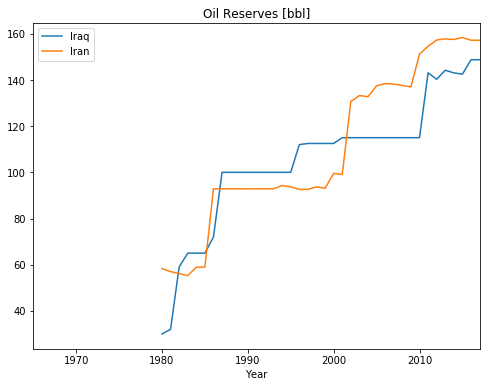

In [75]:
data = pd.read_csv(r'bp2018.csv') #loading the data, this file will be loaded with no problem
fig, ax = plt.subplots(1, 1) # 
data[data['Country']=='Iraq'].plot('Year','oilreserves_bbl', figsize=(8, 6),label='Iraq',title='Oil Reserves [bbl]',ax=ax)
data[data['Country']=='Iran'].plot('Year','oilreserves_bbl',label='Iran',ax=ax)
plt.legend()


aoviously there are some missing data at the begining of the graphs. Here we are filling it with mean of each catagory , i.e. *Country* here:

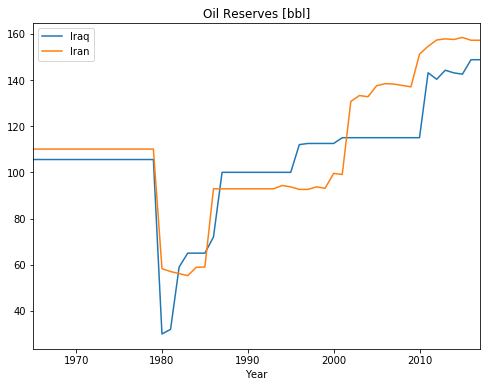

In [68]:
data['oilreserves_bbl'] = data.groupby('Country')['oilreserves_bbl'].transform(lambda x: x.fillna(x.mean()))

fig, ax = plt.subplots(1, 1)
data[data['Country']=='Iraq'].plot('Year','oilreserves_bbl', figsize=(8, 6),label='Iraq',title='Oil Reserves [bbl]',ax=ax)
data[data['Country']=='Iran'].plot('Year','oilreserves_bbl',label='Iran',ax=ax)
plt.legend()

rather that mean we could use **back fill** to fill the data using the first point and fill backward

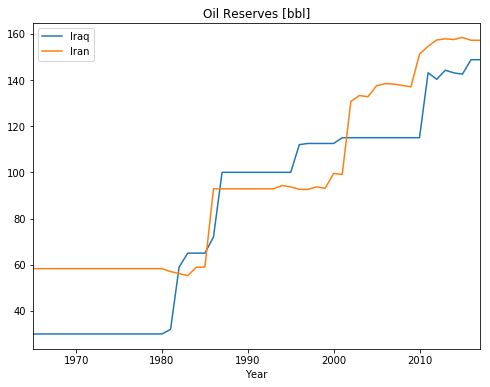

In [73]:
data = pd.read_csv(r'bp2018.csv') #loading the data, this file will be loaded with no problem
data['oilreserves_bbl'] = data.groupby('Country')['oilreserves_bbl'].fillna(method="bfill")
#data['oilreserves_bbl'] = data.groupby('Country')['oilreserves_bbl'].fillna(method="ffill") 

fig, ax = plt.subplots(1, 1)
data[data['Country']=='Iraq'].plot('Year','oilreserves_bbl', figsize=(8, 6),label='Iraq',title='Oil Reserves [bbl]',ax=ax)
data[data['Country']=='Iran'].plot('Year','oilreserves_bbl',label='Iran',ax=ax)
plt.legend()

some times it is requiered to run both ffill and bfill. For example in the above example ffill does nothing, but imagin if we had missing data in the front, then we would have need ffill for that segment.

## Part 6: Getting dummy variables

In [76]:
data.head()

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,biofuels_kboed,...,oilreserves_bbl,primary_mtoe,refcap_kbd,refthru_kbd,renewables_mtoe,renewables_twh,solar_mtoe,solar_twh,wind_mtoe,wind_twh
0,Algeria,1965,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,2.122521,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,Algeria,1966,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,2.556875,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,Algeria,1967,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,2.416595,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,Algeria,1968,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,2.592053,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,Algeria,1969,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,NaN,...,NaN,2.874065,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
data_dummified=pd.DataFrame(pd.get_dummies(data['Region']))

In [78]:
data_dummified.head()

,Africa,Asia Pacific,CIS,Europe,Middle East,North America,S. & Cent. America
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [80]:
pd.get_dummies(data)

,Year,ISO3166_numeric,OPEC,EU,OECD,biofuels_kboed,biofuels_ktoe,biogeo_mtoe,biogeo_twh,biomass_mtoe,...,SubRegion_Caribbean,SubRegion_Eastern Africa,SubRegion_Europe,SubRegion_Middle Africa,SubRegion_Middle East,SubRegion_North America,SubRegion_Northern Africa,SubRegion_South America,SubRegion_Southern Africa,SubRegion_Western Africa
0,1965,12.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,1966,12.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1967,12.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1968,12.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,1969,12.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
5,1970,12.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
6,1971,12.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
7,1972,12.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
8,1973,12.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
9,1974,12.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


## Part 7: Findong and removing outliers

### Tuky method

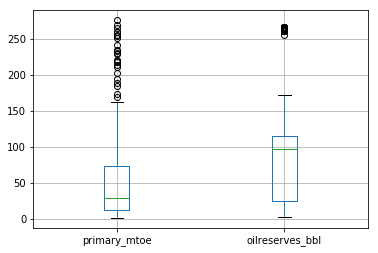

In [97]:
data[data['Region']=='Middle East'].boxplot(column=['primary_mtoe','oilreserves_bbl'])

Obviously there are some outliers beyond the min and max of the data, in the box plot above. we can use the Tukey rule to determine what values of in data are outliers. here is how to calculate (define some range as outlier):

* Find the first quartile (ie .25 quantile)
* Find the third quartile (ie .75 quantile)
* Calculate the inter-quartile range (Q3 - Q1)
* Any value that is greater than Q3 + 1.5 * IQR is an outlier
* Any value that is less than Q1 - 1.5 * IQR is an outlier

In [75]:
data_slice1=data[data['Region']=='Middle East']
Q1 = data_slice1['primary_mtoe'].quantile(0.25)
Q3 = data_slice1['primary_mtoe'].quantile(0.75)
IQR = Q3 - Q1
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR
data_outliers1 = data_slice1[(data_slice1['primary_mtoe'] > max_value) | (data_slice1['primary_mtoe'] < min_value)]

In [79]:
list(set(data_outliers1['Country'])) #countries that are outlier in primary_mtoe

['Iran', 'United Arab Emirates', 'Saudi Arabia']

In [77]:
data_slice2=data[data['Region']=='Middle East']
Q1 = data_slice2['oilreserves_bbl'].quantile(0.25)
Q3 = data_slice2['oilreserves_bbl'].quantile(0.75)
IQR = Q3 - Q1
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR
data_outliers2 = data_slice2[(data_slice2['oilreserves_bbl'] > max_value) | (data_slice2['oilreserves_bbl'] < min_value)]

In [80]:
list(set(data_outliers2['Country'])) #countries that are outlier in oilreserves_bbl

['Saudi Arabia']

In [81]:
list(set(data_outliers1['Country']).intersection(data_outliers2['Country']))  #countries that are outlier in both

['Saudi Arabia']

In [82]:
list(set(data_outliers1['Country']) - set(data_outliers2['Country'])) #countries that are outlier only in one

['Iran', 'United Arab Emirates']

## 2-D plot

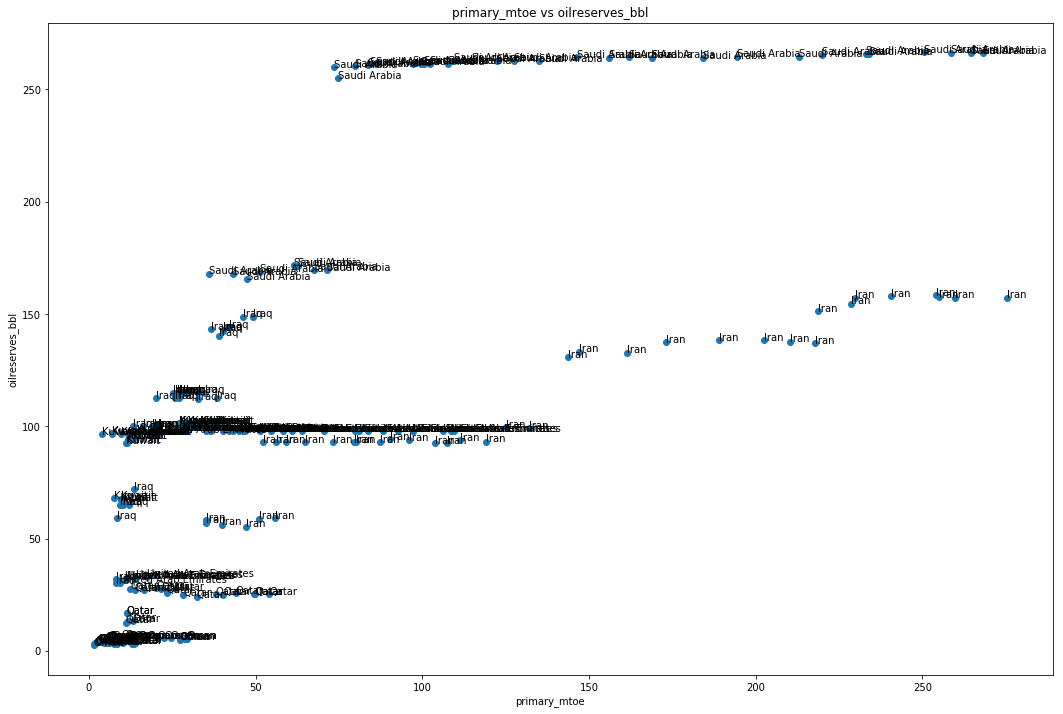

In [96]:
data=data[['Country','primary_mtoe','oilreserves_bbl','Region']]
data=data[data['Region']=='Middle East']
data.dropna(inplace=True)

x = list(data['primary_mtoe'])
y = list(data['oilreserves_bbl'])
text = data['Country']

fig, ax = plt.subplots(figsize=(18,12))
ax.scatter(x, y)
plt.title('primary_mtoe vs oilreserves_bbl')
plt.xlabel('primary_mtoe')
plt.ylabel('oilreserves_bbl')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

## Remove outliers

In [103]:
def remove_outliers(data_frame, column_name):
    data = data_frame[column_name]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR

    return data_frame[(data_frame[column_name] < max_value) & (data_frame[column_name] > min_value)]

In [104]:
data = pd.read_csv(r'bp2018.csv') #loading the data, this file will be loaded with no problem
data_outliers_removed=data[data['Region']=='Middle East'].copy()

In [105]:
for column in ['primary_mtoe', 'oilreserves_bbl']:
    data_outliers_removed = remove_outliers(data_outliers_removed, column)

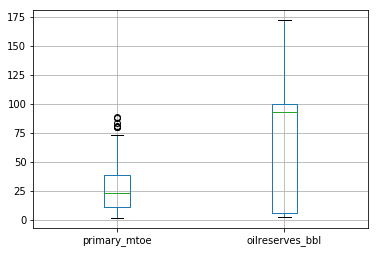

In [106]:
data_outliers_removed.boxplot(column=['primary_mtoe','oilreserves_bbl'])

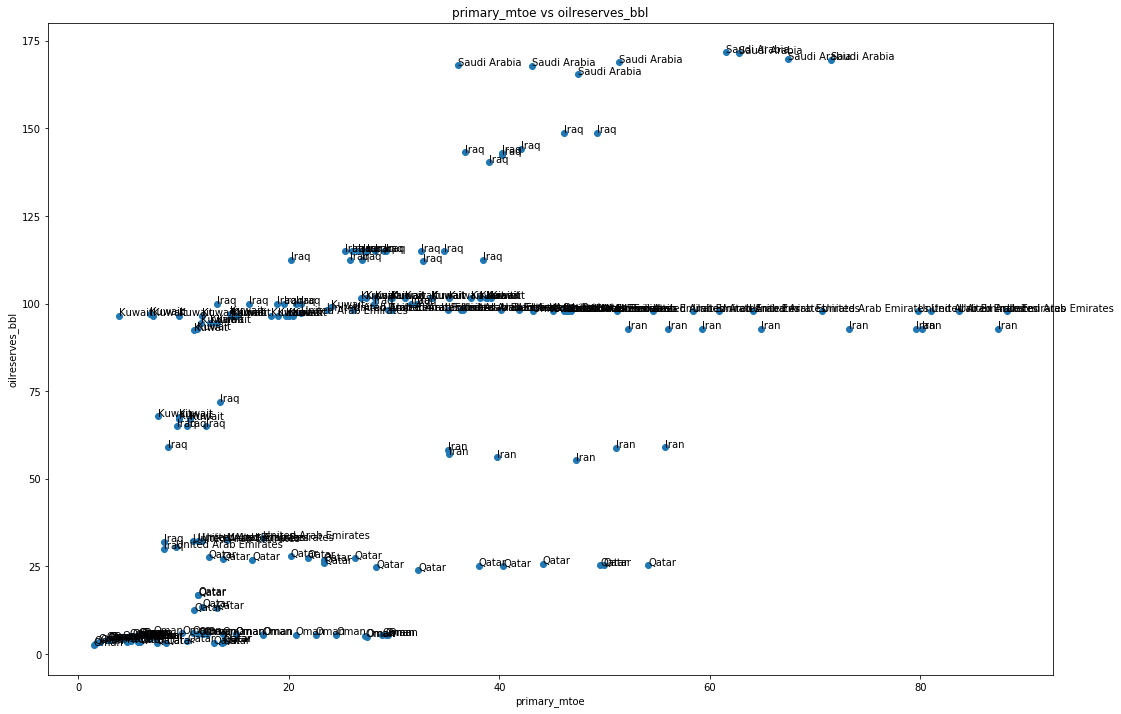

In [107]:
data_outliers_removed=data_outliers_removed[['Country','primary_mtoe','oilreserves_bbl','Region']]
data_outliers_removed.dropna(inplace=True)
x = list(data_outliers_removed['primary_mtoe'])
y = list(data_outliers_removed['oilreserves_bbl'])
text = data_outliers_removed['Country']

fig, ax = plt.subplots(figsize=(18,12))
ax.scatter(x, y)
plt.title('primary_mtoe vs oilreserves_bbl')
plt.xlabel('primary_mtoe')
plt.ylabel('oilreserves_bbl')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

## Part 8: Scaling and Transforms
For highly-skewed feature distributions, it is common practice to apply a *logarithmic transformation*. Also usually it is requierd to do scaling on some features of the data.

In [ ]:
''' this code is not going to run, and is just for referece'''
#calculating logarithmic scale on some columns
skewed_columns = ['col1', 'col2']
data_log_transformed = data.copy()
data_log_transformed[skewed_columns] = data_log_transformed[skewed_columns].apply(lambda x: np.log(x + 1))

#applying scaler on some columns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler() # default=(0, 1)
#scaler = StandardScaler() # default=(-1, 1)
numerical_columns = ['col1','col2']
data_minmax_scaled = data.copy()
data_minmax_scaled[numerical_columns] = scaler.fit_transform(data_minmax_scaled[numerical])